In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../data/raw/NematodaForIQTree.csv"
df = pd.read_csv(path)
df.head()

,Species,Gene,Sequence
0,Bursaphelenchus xylophilus,COX1,ATTTTAAAGTTTAAATTTCAAGAAAGTTATAAATATTGATTTGAGA...
1,Bursaphelenchus xylophilus,COX2,ATTTTTAATTATTTTCAAGGTTATAATTTAAATTTTTCTAGTAGTA...
2,Bursaphelenchus xylophilus,ND3,ATTATTTTTTTTTTTGTTTTTTTTGGTTGTTTATTTTTATTTTTAT...
3,Bursaphelenchus xylophilus,ND5,ATTAATTTGATATTTTTTTTAGTATTTTTGGGGTTTATATTTATAT...
4,Bursaphelenchus xylophilus,ND6,ATTATTTTTTATTATTTTTTTTTTTTAATAATTTTAATTTGTTATT...


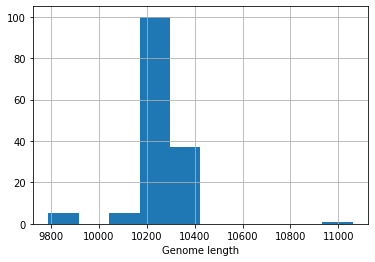

In [10]:
df.groupby("Species").apply(lambda x: "".join(x.Sequence)).apply(len).hist()
plt.xlabel("Genome length");

In [29]:
df.Gene.value_counts()

COX3    149
COX1    148
COX2    148
ND3     148
ND5     148
ND6     148
ND4L    148
ND1     148
ATP6    148
ND2     148
CYTB    148
ND4     148
Name: Gene, dtype: int64

In [30]:
set(df.Gene.value_counts())

{148, 149}

In [9]:
df.groupby("Species").Gene.value_counts().sort_values()

Species                                         Gene
Acanthocheilonema viteae                        ATP6    1
Oesophagostomum asperum                         COX2    1
                                                COX1    1
                                                ATP6    1
Nippostrongylus brasiliensis                    ND6     1
                                                       ..
Contracaecum ogmorhini sensu lato South Africa  ND5     1
                                                ND4L    1
Contracaecum osculatum                          ND4     1
Wuchereria bancrofti                            ND6     1
Camallanus cotti                                COX3    2
Name: Gene, Length: 1776, dtype: int64

In [10]:
df[df.Species == "Camallanus cotti"]

,Species,Gene,Sequence
936,Camallanus cotti,COX3,ATTAAGCATTCTTTTCATGTTTTAGGTTTGTCTATTTTACCTGTTA...
937,Camallanus cotti,ND4,GTTTTTTATGTTCTGTTTCTATTAATTTGGGTTTTTTTTTTTGATA...
938,Camallanus cotti,ND2,ATTTGTTTTTTTTTTTTCCTTTATGTTTTTTTTTGTTTTGTTATTG...
939,Camallanus cotti,ND1,TTGTTAGGTGTAGTTATATTTTTTTTGGTTTTAATTTTTTTGGTTT...
940,Camallanus cotti,ATP6,TTGCCTTGTTTTGTGGTGAGTCATTTTTTTGTTGGGTATCATGATA...
941,Camallanus cotti,COX1,TTGTATAGAAGTCGTAGAATTTTTTATTGGTTGGAAACTACTAATC...
942,Camallanus cotti,COX2,TTGTTTATTGATTTTGGTTTGGGATTTTTGTCGAGTCACCACTCTA...
943,Camallanus cotti,ND3,TTGTTTGTTTTTGCTTTTTATTTGTTGTTGGTTGTTATTTTTGTTT...
944,Camallanus cotti,ND5,TTGGATATATTTATTTTTGTTTTGTTGTTTTTAATTCTGTTTTTTT...
945,Camallanus cotti,CYTB,GTGTTATCTAATGTTTTTTGGGGTTCTCTAATTGTTTTGCCTGCTA...


In [22]:
df[(df.Species == "Camallanus cotti") & (df.Gene == "COX3")]

,Species,Gene,Sequence
936,Camallanus cotti,COX3,ATTAAGCATTCTTTTCATGTTTTAGGTTTGTCTATTTTACCTGTTA...
946,Camallanus cotti,COX3,ATTAAGCATTCTCTTCATGTTTTAGGTTCGTCTATTTTACCTGTTA...


In [19]:
s1, s2 = df[(df.Species == "Camallanus cotti") & (df.Gene == "COX3")].Sequence.values
print(s1)
print(s2)

ATTAAGCATTCTTTTCATGTTTTAGGTTTGTCTATTTTACCTGTTATGGTATCTTTAGGTATTTTAAGTTTGGCTAGGTCTTTTATTGTTTTTTTATTATTTTCCTTTAATTATAGTGTTTTTTATAGTTTGATGGTTATTTTTTTTGTTTTGATTTTTTGGGGTAAGGATGTAGGAATGGAGTCTTTATCTGGTTGTCACAATATTCGTATTAGTGAAGGATTCCGTTATGGGATGTATTTATTTGTTTTTAGAGAGGTGATGTTCTTCTTTAGTATTTTTTGGTTTTTTTTTGATTGTGCTGTTTCTAGGGACGAGGGAGCTTGGCCGCCTAGGGGTGTGGAGATAGTGGACCCTATGGGTGTGCCTTTTTTGAATACAATGATTTTGTTGACTAAAAGTTTAACTGTCACATGAGCTCATCATTGTTTATTGGTTAATAAAGATAGGGTAATGCCTTTGTTTGTGACTTGTTTTTTGGGTTTGTTCTTTATTAAAATACAGGTGGATGAGTATAGGATGGCTTCCTTTTCAATTTCGGATTGTTCTTATGGTAGTATTTTTTATTTATCTACCGGTTTTCATGGGGCCCATGTGACTGGGGGTACTTTATTTTTGCTTTTTAATTTGTTTCGTTTGTTTTTTAATCATTTTAATTCTTTAAATAATTTAGGTTTGGAGTTTGGTATTGTATATTGGCATTTTGTTGATGTGGTTTGATTATTTTTGTTTGTATTTGTTTATTGTTGAAATTGTTGCTAA
ATTAAGCATTCTCTTCATGTTTTAGGTTCGTCTATTTTACCTGTTATGGTATCTTTAGGTATTTTAAGTTTGGCTAGGTCTTTTATTGTTTTTTTATTATTTTCCTTTTATTATAGTGTTTTTTATAGTTTGATGGTTATTTTTTTTGTTTTGATTTTTTGGGGTAAGGATGTAGGAATGGAGTCTTTATCTGGTTGTCACAATATTCGTATTAGTGAAGGATTCCGTTATGGGATG

In [18]:
s1 == s2

False

In [21]:
n = len(s1)

matches = mismatches = 0
for i in range(n):
    if s1[i] == s2[i]:
        matches += 1
    else:
        mismatches += 1

print(f"matches: {matches}, mismatches: {mismatches}, n: {n}")

matches: 757, mismatches: 5, n: 762


In [23]:
df.drop(946, inplace=True)

In [25]:
set(df.Gene.value_counts())

{148}

In [27]:
PATH_TO_OUT = "../data/interim/devilworm_genes.csv"
df.to_csv(PATH_TO_OUT, index=None)